In [1]:
from Chemometrics.basic import read_spc
import glob
import pandas as pd 
from Chemometrics.basic import regstr,plot_ConfusionMatrix
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV,cross_val_predict
from sklearn.metrics import f1_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from utils import train_and_evaluate
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

%matplotlib inline

# 读取葛根红外数据.spc

In [2]:
allfiles = glob.glob('./文章合作2-葛根数据-NIR/data/*.spc')

In [3]:
# 吸光度
a = [read_spc(f) for f in allfiles]
gg = pd.concat(a,axis=1)
# labels
snames = [regstr(f,'(?<=\\\\).*(?=\s\.spc)') for f in allfiles]
s= [regstr(f,'(?<=\\\\).*(?=-)')[:4] for f in allfiles]
# location
locations = [_[:2] for _ in s]
gg.columns = snames
# 类别
names = list(np.unique(s))
categories = ['柴葛','柴葛','粉葛','柴葛','粉葛','粉葛','粉葛','粉葛','粉葛','粉葛','柴葛','粉葛']
# imbalance class
name2categories = dict(zip(names,categories))
cats = [name2categories[si] for si in s]
labels = [l+c for l,c in zip(locations,cats)]

~~~py
from Chemometrics.basic import  psave
psave({'IR':gg,'locations':locations,'categories':cats,'labels':labels},'葛根.p')
~~~

In [4]:
print('{1}个样本,{0}个光谱变量'.format(*gg.shape))
gg.T.head(2)

120个样本,1557个光谱变量


Wavenumber (cm-1),10001.0283203,9997.17138688,9993.31445344,9989.45752,9985.60058657,9981.74365313,9977.88671969,9974.02978625,9970.17285282,9966.31591938,...,4034.35229351,4030.49536007,4026.63842664,4022.7814932,4018.92455976,4015.06762633,4011.21069289,4007.35375945,4003.49682601,3999.63989258
云南曲靖-01,0.308914,0.308805,0.308864,0.308807,0.308800,0.308688,0.308625,0.308547,0.308563,0.308531,...,0.929343,0.931371,0.933174,0.934645,0.935784,0.936482,0.936842,0.936786,0.936738,0.936358
云南曲靖-02,0.308121,0.308068,0.308186,0.308081,0.308051,0.308106,0.308199,0.308066,0.308027,0.307928,...,0.929947,0.932067,0.933817,0.935204,0.936287,0.937051,0.937421,0.937363,0.937367,0.937001


# data description

In [5]:
pd.DataFrame(labels,columns=['label count']).groupby(labels).count().T

,云南柴葛,四川粉葛,安徽柴葛,安徽粉葛,广西粉葛,恩典粉葛,柳州粉葛,湖北粉葛,湖南柴葛,重庆粉葛
label count,20,10,10,10,20,10,10,10,10,10


# data visualizaiton

- visualizing the distribution(categorical)
- countplot

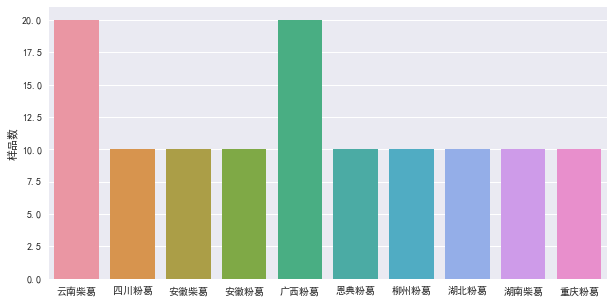

In [13]:
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(labels)
plt.ylabel('样品数')
plt.savefig('葛根种类地点.png',dpi=300)

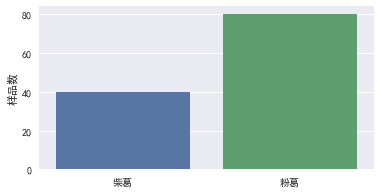

In [16]:
plt.rcParams['figure.figsize']=(6,3)
sns.countplot(cats)
plt.ylabel('样品数')
plt.savefig('葛根种类.png',dpi=300)

In [ ]:
plt.rcParams['figure.figsize']=5,10
plt.subplot(3,1,3)
sns.countplot(labels)
plt.subplot(3,1,1)
sns.countplot(locations)
plt.subplot(3,1,2)
sns.countplot(cats)

- 共90个样本
- 1557个光谱变量

In [ ]:
plt.rcParams['figure.figsize']=10,5
gg.plot(legend=False)
plt.ylabel('log(1/R)') #R: reflectance

# 建模
## 对地点建模

In [ ]:
#决策树-地点分类
DT = DecisionTreeClassifier()

In [ ]:
clf = train_and_evaluate(gg.T,locations)

## refit模型比交叉验证模型的预测效果好算是过拟合吗？
- train_test_split
- train: cross_validation ==> refit
- test: predict

## 种类建模

In [ ]:
clf = train_and_evaluate(gg.T,cats)

## 地点+种类建模

In [ ]:
clf_labels = train_and_evaluate(gg.T,labels)

In [ ]:
from Chemometrics.basic import  psave
psave({'IR':gg,'locations':locations,'categories':cats,'labels':labels},'葛根.p')